<a href="https://colab.research.google.com/github/FloraQin0325/machine_learning_for_imaging_CW1/blob/master/MLI_CW_1(2)(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO416 - Machine Learning for Imaging

## Coursework 1 - Classification

In this coursework you will be applying the material taught in the course up to and including lecture 4.

$\mathbf{NOTE - \text{READ THIS}:}$ 
- During this coursework you will be asked to comment on the performance of various aspects of the models you develop. The discussion should be done along the following lines:
    - Maximum 100 words of discussion - You are asked to be brief and on point, platitudes and excessive writing will be penalized
    - You should mention effects on accuracy, and computational requirements i.e. time and computational complexities. Empirical arguments are accepted 
    
- When you are asked to change the hyperparamenters, validate the performance of your classifier and explicitly state the optimal hyperparameters you found and their accuracy

## Question 1 (50 Points) 

In this question we will use a toy spiral dataset as generated by the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function of sklearn

1) Create a dataset of 1000 points with a noise value of 0.1 and random_state=0 and augment it using polynomial features (recommended degree 10-15) (4 points)

In [0]:
## ADD YOUR CODE HERE
import numpy as np
import struct 
import gzip
import pandas as pd 
import sklearn
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.pipeline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, AdaBoostClassifier
from sklearn import tree


np.random.seed(42)
X, Y = make_moons(1000, noise=0.42,random_state=None)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

poly = PolynomialFeatures(degree=12)

x_train_poly = poly.fit_transform(x_train.reshape(800,-1))

poly = PolynomialFeatures(degree=12)

x_test_poly = poly.fit_transform(x_test.reshape(200,-1))


x_train_poly, x_val_poly, y_train, y_val = train_test_split(x_train_poly, y_train, test_size = 0.1)



2) Visualize your input data - the first 2 dimensions would suffice  (3 points)



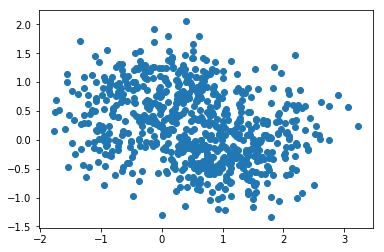

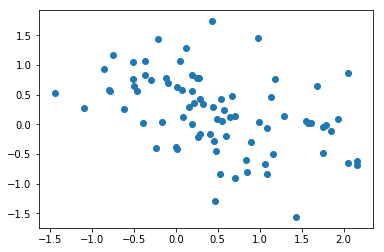

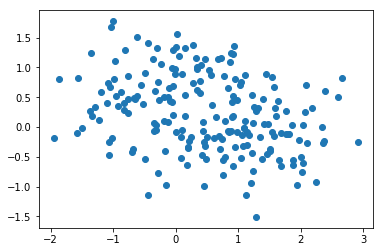

In [0]:
## ADD YOUR CODE HERE
plt.figure()
plt.scatter(x_train_poly[:,1], x_train_poly[:,2])
plt.figure()
plt.scatter(x_val_poly[:,1], x_val_poly[:,2])
plt.figure()
plt.scatter(x_test_poly[:,1], x_test_poly[:,2])

3) Use a Decision Tree to classify the data (5 points)



In [0]:
## ADD YOUR CODE HERE
clf_gini = tree.DecisionTreeClassifier(criterion="gini", random_state = 42)
clf_gini = clf_gini.fit(x_train_poly, y_train)
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy", random_state = 42)
clf_entropy = clf_entropy.fit(x_train_poly, y_train)

4) Try both Gini Impurity and Information Gain, which performs better? What is the difference between them? (4 points)

In [0]:
## ADD YOUR CODE HERE
y_test_pred_gini = clf_gini.predict(x_test_poly)
y_test_pred_entropy = clf_entropy.predict(x_test_poly)
print(clf_gini.score(x_test_poly,y_test))
print(clf_entropy.score(x_test_poly,y_test))


0.785
0.765


According to this example, the cost function of Gini Impurity performs better than the Information Gain.
The difference is that Information Gain calculates logarithm of probability, while the Gini Index calculates the probability. So the calculation speed of Gini Index is faster. 
Besides that, the Gini Index tends to isolate the largest class in the branches of the tree, while the Information Gain tends to produce slightly more balanced decision tree models.

5) Perform classification using a tree depth of 1-20. Plot the accuracy versus tree depth. (5 points)



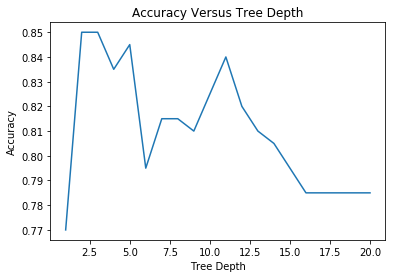

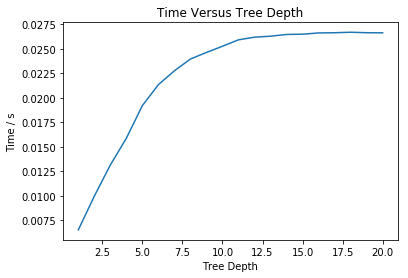

In [0]:
## ADD YOUR CODE HERE
import time
acc = []
times = []
# x_axis = np.linspace(1, 20, 20)
x_axis = np.arange(1, 21)
for i in range(1, 21):
    start = time.clock()
    clf = tree.DecisionTreeClassifier(max_depth=i, random_state = 42)
    clf = clf.fit(x_train_poly, y_train)
    end = time.clock()
    acc.append(clf.score(x_test_poly,y_test))
    times.append(end - start)
plt.figure()
plt.title("Accuracy Versus Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.plot(x_axis, acc)
plt.figure()
plt.title("Time Versus Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Time / s")
plt.plot(x_axis, times)
plt.show()

6) How does the depth of a tree affect performance and computational burden? (1 points)



Generally, as the depth increases, the performance ascended in the beginning, but quickly started to descend with fluctuation. In the end, the accuracy stablized at relatively low level. Meanwhile, we oberved a logarithmic growth over running time which shows a logarithmic growth in computational burden.

7) Use Bootstrap Classifier to classify your data, base estimator should be a decision tree. Tune hyperparameters of tree depth, n_of estimators, max_samples and bootstrap. Plot accuracy versus different hyperparameters. (7 points)



In [0]:
## ADD YOUR CODE HERE
acc = []
# find optimal hyperparameters
max_depth = range(1,21)
n_estimators = range(1, 21)
max_samples = range(1, 10)
bootstrap = [0, 1]
accuracy = np.zeros((len(max_depth), len(n_estimators), len(max_samples), len(bootstrap)))

for i in max_depth:
    for j in n_estimators:
        for p in max_samples:
            for q in bootstrap:
                base_estimator = tree.DecisionTreeClassifier(max_depth = i, random_state = 42)
                bag = BaggingClassifier(base_estimator=base_estimator,
                                  n_estimators = j, max_samples=float(p)/10.0, bootstrap = q, random_state = 42).fit(x_train_poly, y_train)
                score = bag.score(x_val_poly,y_val)
                accuracy[i - 1, j - 1, p - 1, q] = score
# print("ScoreOnTest: " +str(bestBagClassifier.score(x_test_poly,y_test)))


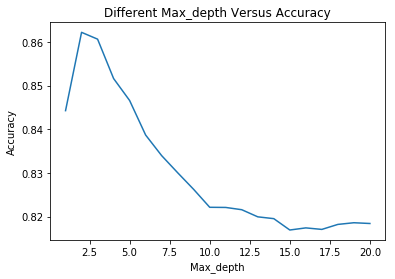

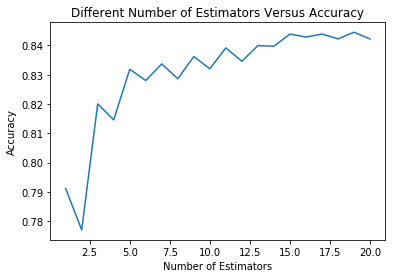

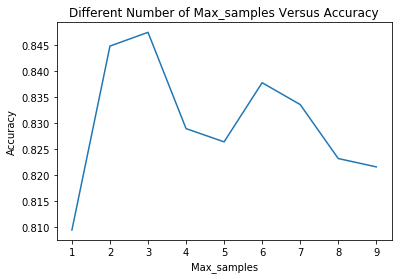

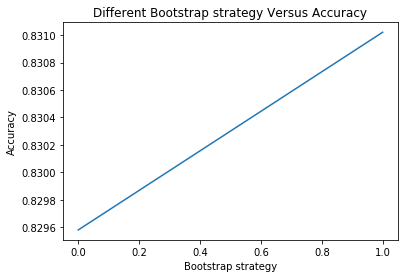

In [0]:
max_depth_acc = np.mean(accuracy, axis = (1,2,3))
n_estimators_acc = np.mean(accuracy, axis = (0,2,3))
max_samples_acc = np.mean(accuracy, axis = (0,1,3))
bootstrap_acc = np.mean(accuracy, axis = (0,1,2))
plt.figure()
plt.title("Different Max_depth Versus Accuracy")
plt.plot(max_depth, max_depth_acc)
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.show()
plt.figure()
plt.title("Different Number of Estimators Versus Accuracy")
plt.plot(n_estimators, n_estimators_acc)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()
plt.figure()
plt.title("Different Number of Max_samples Versus Accuracy")
plt.plot(max_samples, max_samples_acc)
plt.xlabel("Max_samples")
plt.ylabel("Accuracy")
plt.show()
plt.figure()
plt.title("Different Bootstrap strategy Versus Accuracy")
plt.plot(bootstrap, bootstrap_acc)
plt.xlabel("Bootstrap strategy")
plt.ylabel("Accuracy")
plt.show()

8) Why do we use Bootstraping when we create our datasets? Did you use replacement ? Why ? (1 points) 

Using BootStraping allows us to create a larger dataset based on the orignial real-world relatively small dataset.
According to the accuracy of the above test, we would like to use replacement. 

9)  Use a Decision Forest to classify the new dataset (4 points)



In [0]:
## ADD YOUR CODE HERE
model = RandomForestClassifier(n_estimators = 10, random_state = 42)
model.fit(x_train_poly,y_train)
print(model.score(x_test_poly,y_test))

0.82


10) Modulate the number of trees to 1-99 with a step of 10. Plot accuracy versus number of trees. (4 points)



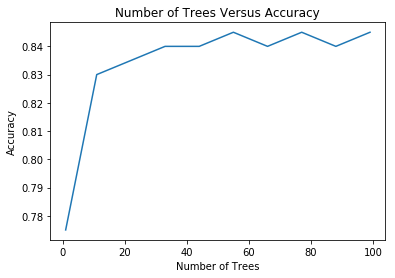

0.845
55


In [0]:
## ADD YOUR CODE HERE
acc = []
best = 0
bestNum = 0
numberOfTrees = np.linspace(1,99,10)
numberOfTrees = numberOfTrees.astype(int)
for num in numberOfTrees:
    model = RandomForestClassifier(n_estimators = num, random_state = 42)
    model.fit(x_train_poly,y_train)
    score = model.score(x_test_poly,y_test)
    acc.append(score)
    if(best<score):
        best = score
        bestNum = num
plt.figure()
plt.title("Number of Trees Versus Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.plot(numberOfTrees, acc)
plt.show()
print(best)
print(bestNum)
######         11

11) Modulate the depth of  the trees from 1 to 20 - use best number of trees from above. Plot the accuracy versus depth. (4 points)



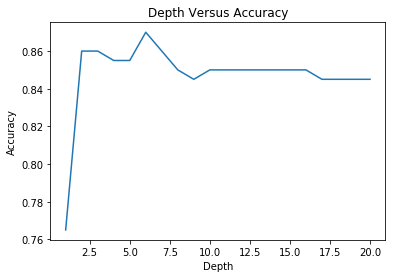

0.87
6


In [0]:
## ADD YOUR CODE HERE
acc = []
best = 0
bestNum = 0
depth = range(1,21)
for num in depth:
    model = RandomForestClassifier(n_estimators = 55, max_depth = num, random_state = 42)
    model.fit(x_train_poly,y_train)
    score = model.score(x_test_poly,y_test)
    acc.append(score)
    if(best<score):
        best = score
        bestNum = num
plt.figure()
plt.title("Depth Versus Accuracy")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.plot(depth, acc)
plt.show()
print(best)
print(bestNum)
######         11

12) Comment on the performance change while you modulate depth of trees and number of trees (3 points)

In the beginning, the accuracy increased rapidly as the depth or the number of trees increase. The ascend of accuracy was so fast that the maximal accuracy was achieved only after a relatively small number of rounds and thereafter, the accuracy stabalized.

13) Visualise how the classification split is done in relation to the data both for Decision Tree and Decision Forest (3 points)

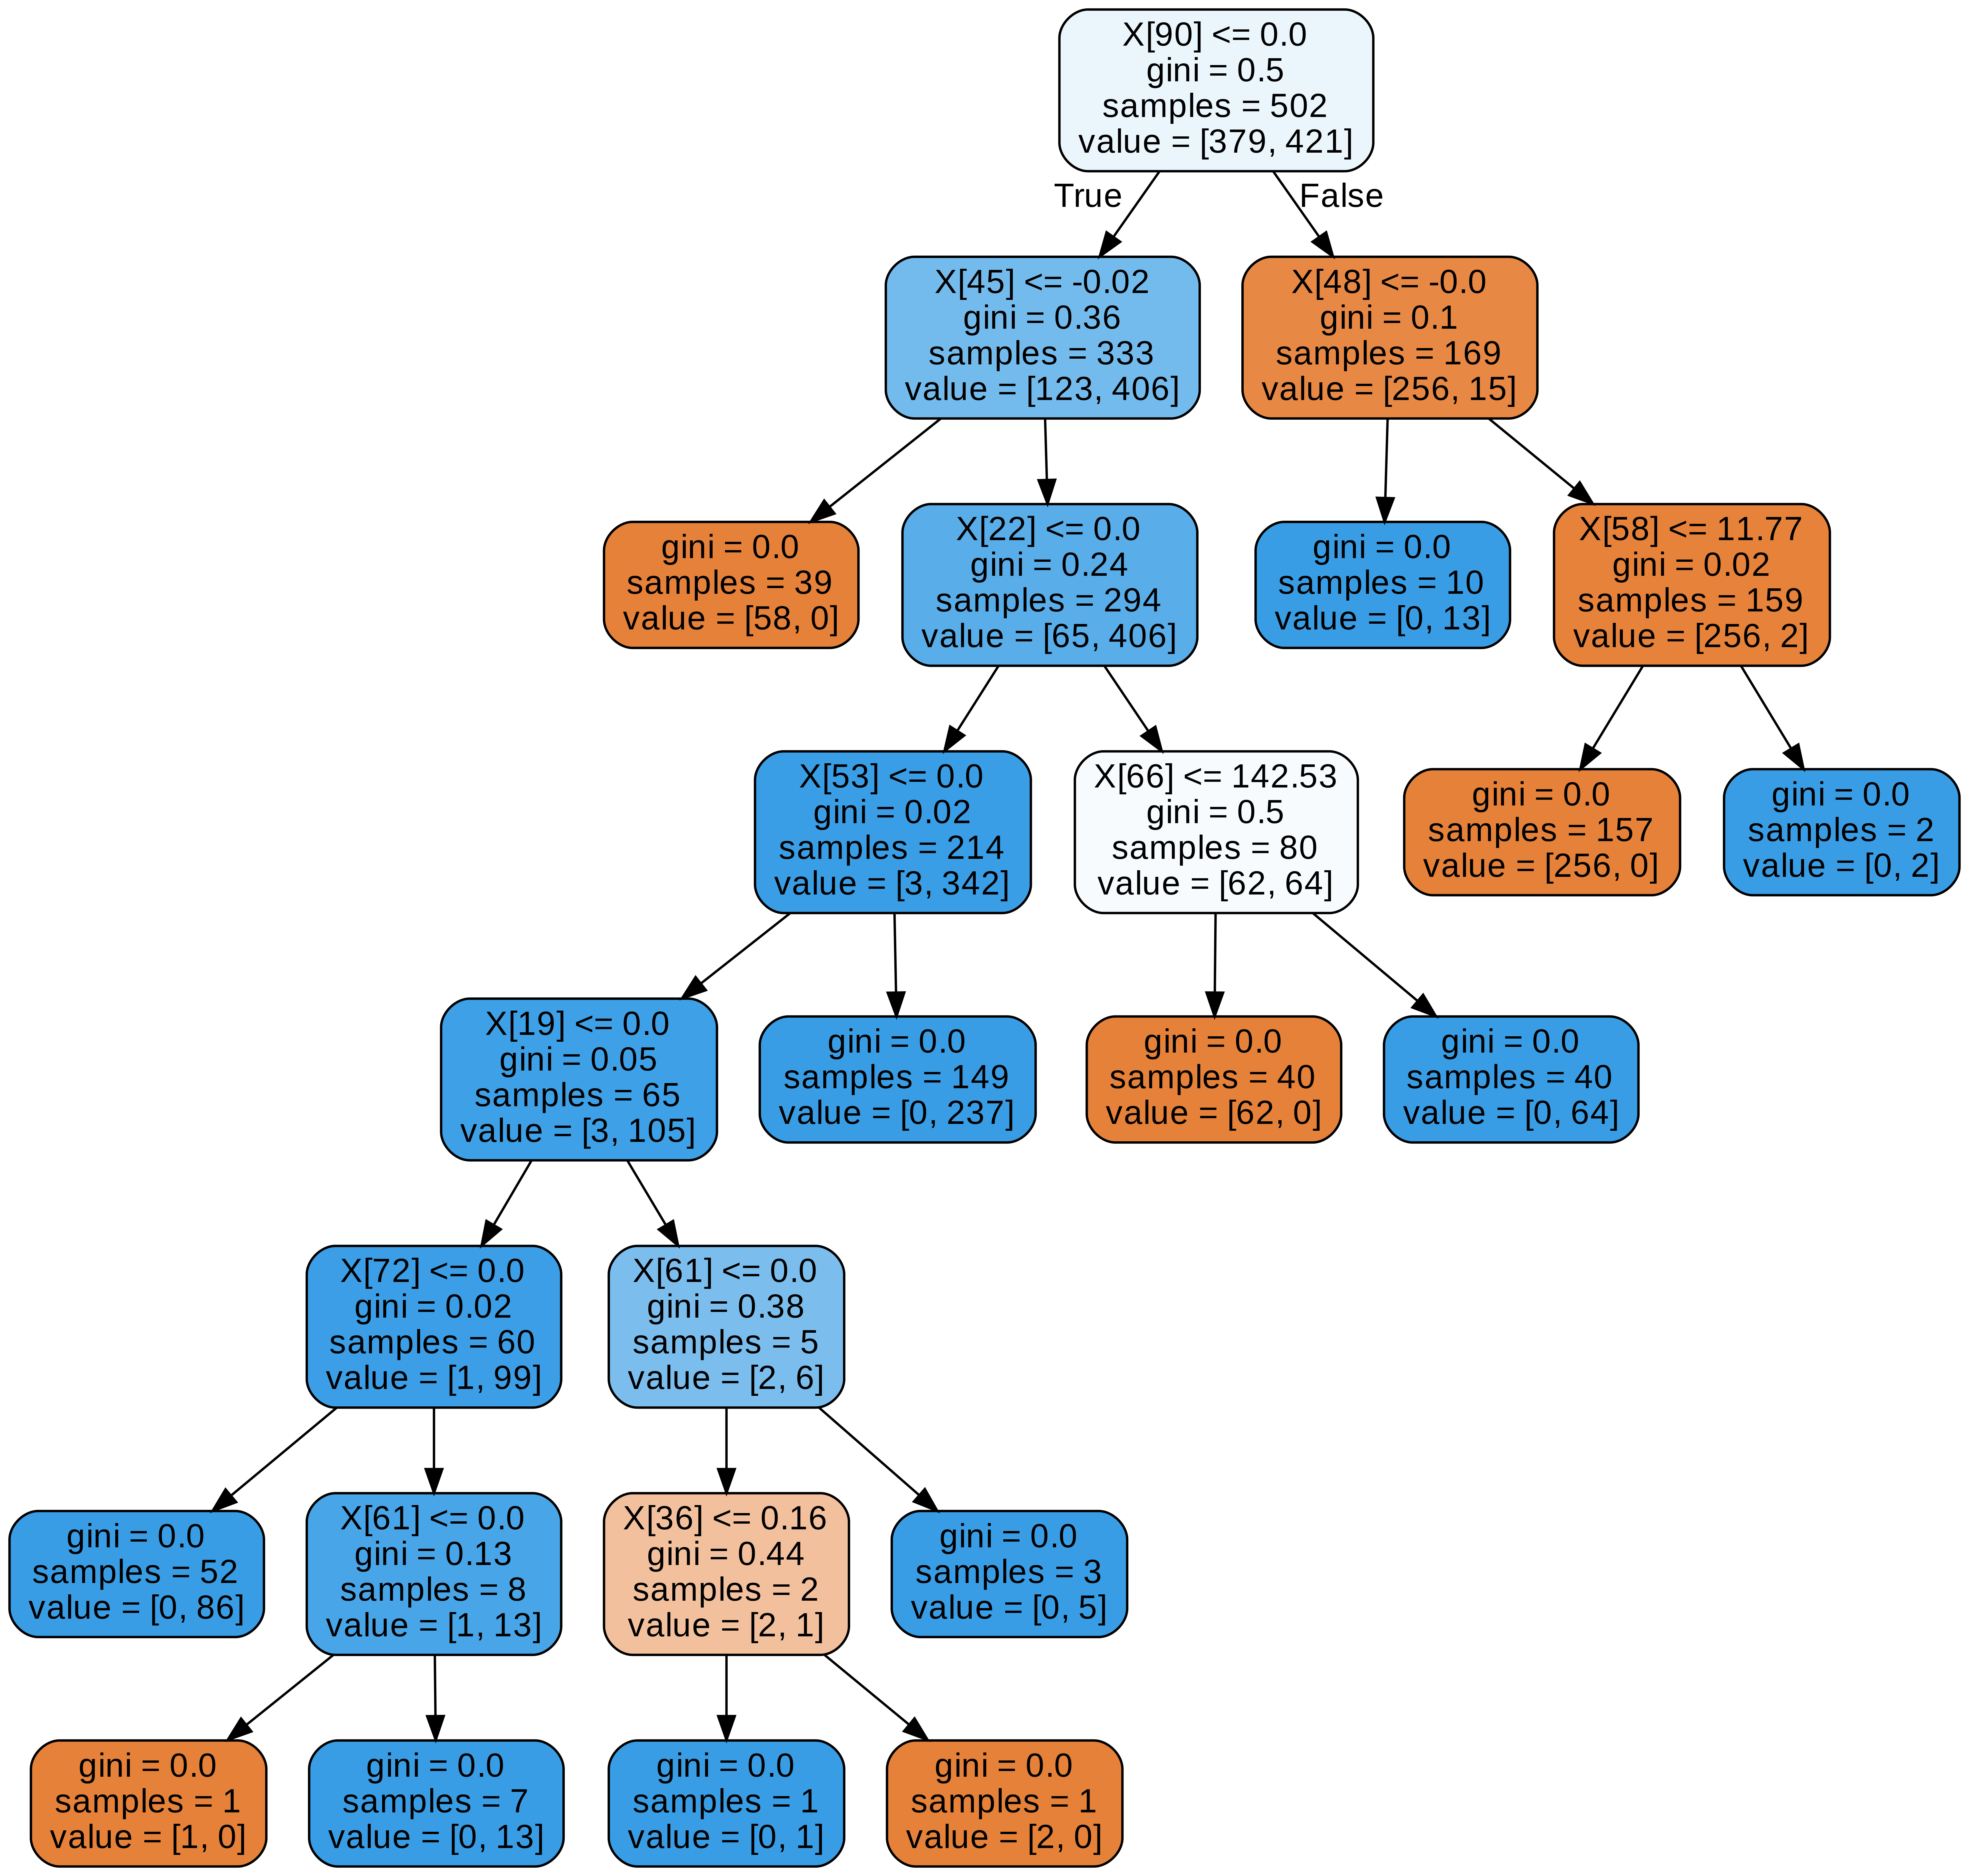

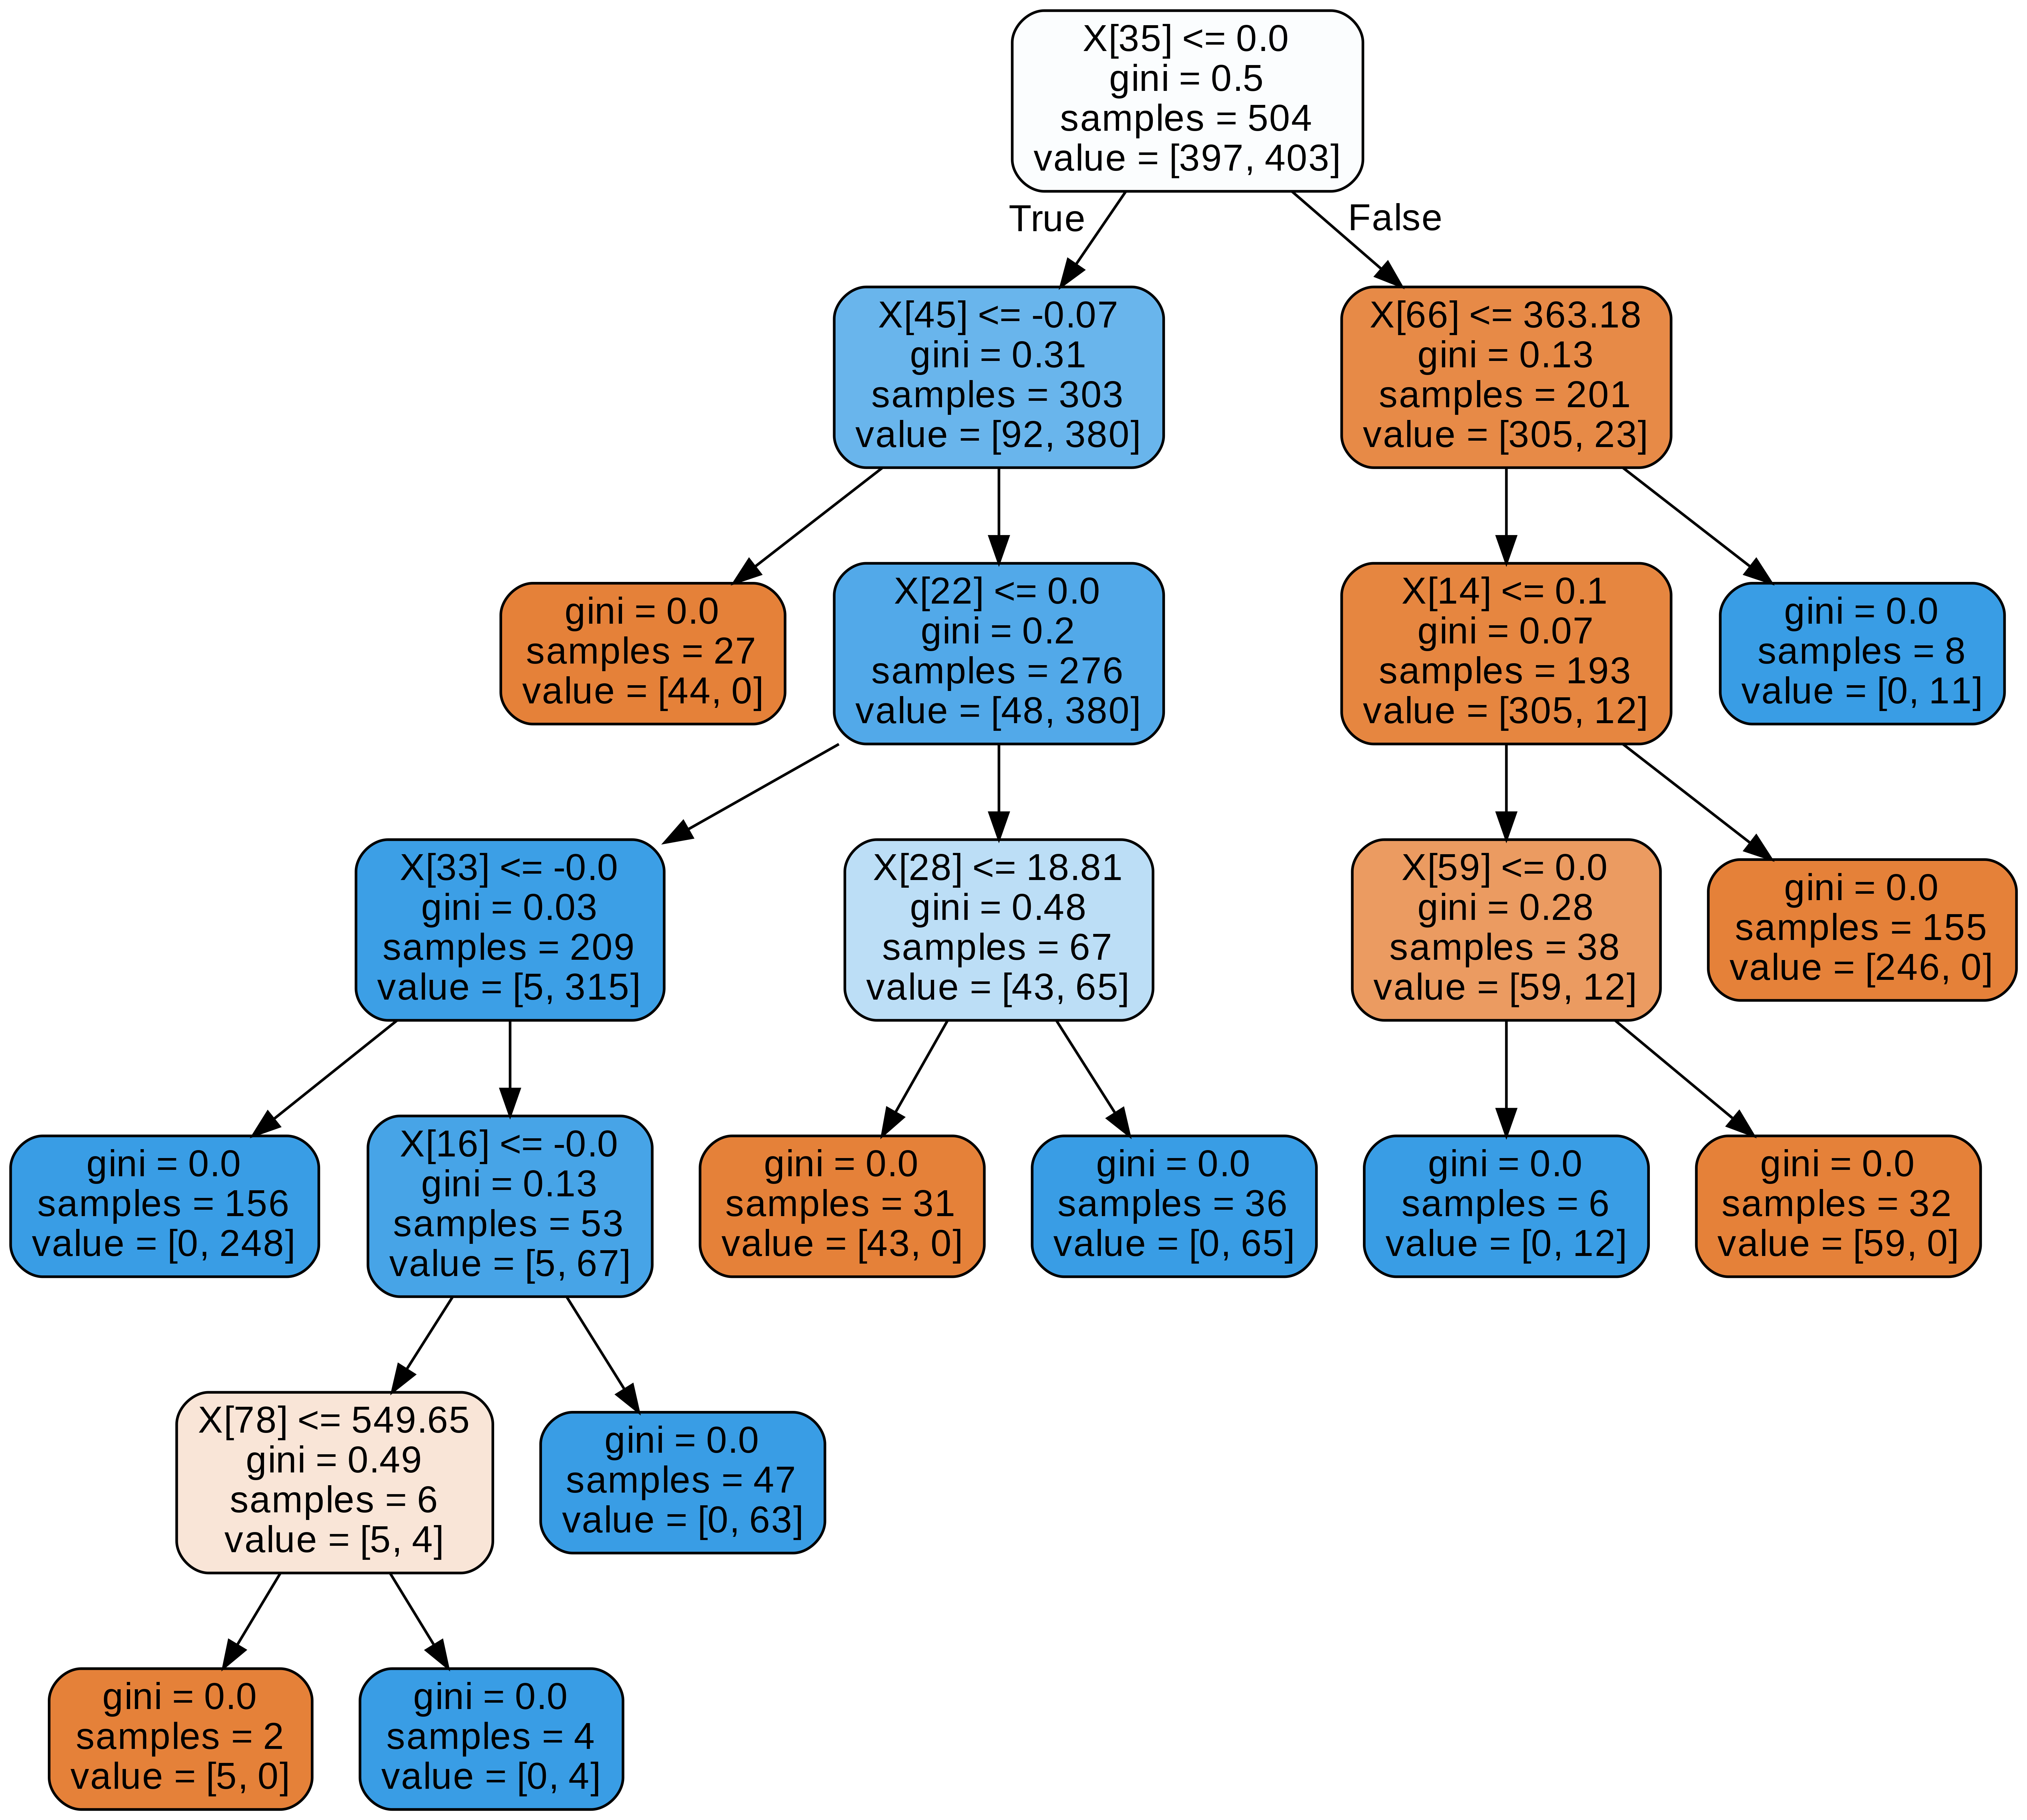

In [0]:
## ADD YOUR CODE HERE
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image, display
import matplotlib.image as mpimg


numberOfTrees = 3
clf_RF = RandomForestClassifier(n_estimators = numberOfTrees, random_state = 42)
clf_RF.fit(x_train_poly, y_train)
# estimator = clf_RF.estimators_[2]

clf_DT = tree.DecisionTreeClassifier(random_state = 42)
clf_DT.fit(x_train_poly, y_train)

tree.export_graphviz(clf_DT, out_file='decisiontree.dot') 
# tree.export_graphviz(estimator, out_file='randomforest.dot',rounded = True, proportion = False, 
#                 precision = 2, filled = True) 

TreeForest = []
call(['dot', '-Tpng', 'decisiontree.dot', '-o', 'decisiontree.png', '-Gdpi=600'])
TreeForest.append(Image(filename = 'decisiontree.png'))
for i in range(numberOfTrees):
    estimator = clf_RF.estimators_[i]
    tree.export_graphviz(estimator, out_file='randomforest_' + str(i) + '.dot',rounded = True, proportion = False, 
                precision = 2, filled = True) 
    call(['dot', '-Tpng', 'randomforest_' + str(i) + '.dot', '-o', 'randomforest_' + str(i) + '.png', '-Gdpi=600'])
    TreeForest.append(Image(filename = 'randomforest_' + str(i) + '.png'))
    

display(*TreeForest)
# image_RF = Image(filename = 'randomforest.png')
# image_RF = mpimg.imread('randomforest.png')
# imgplot = plt.imshow(image_RF)

## Question 2 (50 Points)
In this question we will be using the fashion-MNIST dataset for image classification. 

If you are interested, you may find relevant information regarding the dataset in this paper:
Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

The data is provided under `/vol/lab/course/416/data/fashion`. The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-dimensional vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 classes, which are labelled as follows:
0. T-shirt/top
1. Trousers
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

**Your tasks are** (all tasks carry equal marks):
- Use a Decision Forest to classify t-shirts and ankle boots - tune your forest!
- Train and compare an Adaboost classifier with a decision tree 
- Modulate the number of trees in the Adaboost and the depth of the trees. Comment on the performance and complexity 
- Train a Decsiion Forest for all classes and also compare the performance with another ensemble algorithm of your choice
- What is the theoretical difference between Random Forests and Adaboost classifiers? (100 words max)

In [0]:
# load the data
import numpy as np
import pandas as pd

data_dir = '/vol/lab/course/416/data/fashion/'

df_train = pd.read_csv(data_dir + 'fashion_mnist_train.csv')
df_test = pd.read_csv(data_dir + 'fashion_mnist_test.csv')

x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
y_train = df_train['label'].as_matrix().astype(np.uint8)
x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
y_test = df_test['label'].as_matrix().astype(np.uint8)

/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/vol/lab/course/416/venv/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [0]:
np.random.seed(42)
## ADD YOUR CODE HERE
def sample_data_digits(data, labels, labels_to_select):
    # convert input 3d arrays to 2d arrays
    
    nsamples, nx = data.shape
    
    data_vec = np.reshape(data,(nsamples,nx))
   
    selected_indexes = np.isin(labels, labels_to_select)
    selected_data = data_vec[selected_indexes]
    selected_labels = labels[selected_indexes]
    
    
    # Convert images from gray to binary by thresholding intensity values
    selected_data = 1.0 * (selected_data >= 128)

    # convert labels to binary: digit_1=False, digit_2=True
    selected_labels = selected_labels==labels_to_select[1]
    # shuffle data
    shuffle_index = np.random.permutation(len(selected_labels))
    selected_data, selected_labels = selected_data[shuffle_index], selected_labels[shuffle_index]
     
    return selected_data, selected_labels


labels_to_select = [0,9]
selected_train_data, selected_train_labels = sample_data_digits(x_train,y_train,labels_to_select)
selected_test_data, selected_test_labels = sample_data_digits(x_test,y_test,labels_to_select)

In [0]:
model = RandomForestClassifier(n_estimators = 5, max_depth=5, random_state = 42)
model.fit(selected_train_data, selected_train_labels)
print(model.score(selected_test_data, selected_test_labels))

0.9875


In [0]:
base_estimator = tree.DecisionTreeClassifier(max_depth=5, random_state = 42)
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators = 5, random_state = 42)
model.fit(selected_train_data, selected_train_labels)
print(model.score(selected_test_data, selected_test_labels))

0.996


0.998
91


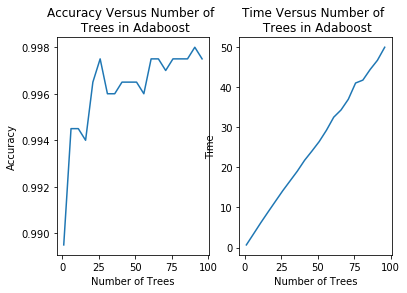

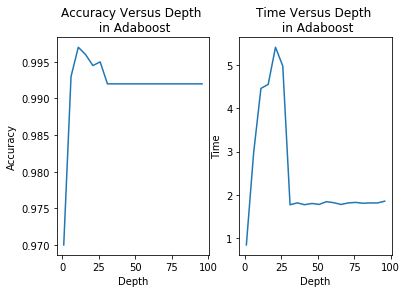

0.997
11


In [0]:
import time
acc = []
times = []
best = 0
bestNum = 0
numberOfTrees = range(1, 101, 5)
# numberOfTrees = numberOfTrees.astype(int)
base_estimator = tree.DecisionTreeClassifier(max_depth=5, random_state = 42)
for num in numberOfTrees:
    start = time.clock()
    model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators = num, random_state = 42)
    model.fit(selected_train_data,selected_train_labels)
    end = time.clock()
    score = model.score(selected_test_data,selected_test_labels)
    
    times.append(end - start)
    acc.append(score)
    if(best<score):
        best = score
        bestNum = num
    
plt.figure()
plt.subplot(1,2,1)
plt.title("Accuracy Versus Number of \n Trees in Adaboost")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.plot(numberOfTrees, acc)
plt.subplot(1,2,2)
plt.title("Time Versus Number of \n Trees in Adaboost")
plt.xlabel("Number of Trees")
plt.ylabel("Time")
plt.plot(numberOfTrees, times)
print(best)
print(bestNum)
plt.show()
acc = []
times = []
best = 0
bestNum = 0
depth = range(1, 101, 5)
for num in depth:
    base_estimator = tree.DecisionTreeClassifier(max_depth=num, random_state = 42)
    start = time.clock()
    model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators = 5,random_state = 42)
    model.fit(selected_train_data,selected_train_labels)
    end = time.clock()
    score = model.score(selected_test_data,selected_test_labels)
    
    times.append(end - start)
    acc.append(score)
    if(best<score):
        best = score
        bestNum = num
plt.figure()

plt.subplot(1,2,1)
plt.title("Accuracy Versus Depth \n in Adaboost")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.plot(depth, acc)
plt.subplot(1,2,2)
plt.title("Time Versus Depth \n in Adaboost")
plt.xlabel("Depth")
plt.ylabel("Time")
plt.plot(depth, times)
plt.show()
print(best)
print(bestNum)

Generally, both the performance and complexity increased as the number of trees and the depth of the trees increase.

In [0]:
model = RandomForestClassifier(n_estimators = 10, max_depth=10, criterion = 'entropy', random_state = 42)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

base_estimator = tree.DecisionTreeClassifier(max_depth=10, criterion = 'entropy', random_state = 42)
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators = 10, random_state = 42)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

Random Forests and Adaboost classifiers try to achieve low error rate in two different ways. As a parallel ensemble algorithm, Random Forests start with complex base models, i.e., trees with low bias but high variance. By combining these independent parallel models, the impact of isolated error is averaged away to reduce bias of prediction. On the other hand, as a sequential ensemble algorithm, Adaboost classifiers usually consist of weak models with low variance but high bias. All base models are not independent so that during training a complementary set of predictors are learnt to reduce the bias.